Proposta StoryTelling:

Checaremos a segurança dos moradores dos 2 condomínios por meio de algumas métricas, dentre as quais:

- Outliers nos horários de entrada e saída dos moradores
- Os dias da semana que as pessoas mais costumam sair e possíveis inconsistências
- Os tipos de veículos mais utilizados pelos moradores
- Verificar possível correlação entre o dia da semana e o horário de entrada e saída
- Verificar a movimentação de ambos os condomínios nos últimos meses

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [ ]:
df_portaria = pd.read_excel('Dados_GCD_Gestao_Condominio_Portaria.xlsx')

In [ ]:
df_portaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26142 entries, 0 to 26141
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   nr_movimento       26142 non-null  int64         
 1   nr_condominio      26142 non-null  int64         
 2   Nome_condominio    26142 non-null  object        
 3   nr_lote            26142 non-null  int64         
 4   Tipo Veículo       26142 non-null  object        
 5   Data_Movimentacao  26142 non-null  datetime64[ns]
 6   Hora               26142 non-null  int64         
 7   entrada_saida      26142 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 1.6+ MB


### Verificando porcentagem de dados missing

In [ ]:
for col in df_portaria.columns:
    pct_missing = np.mean(df_portaria[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

nr_movimento - 0%
nr_condominio - 0%
Nome_condominio - 0%
nr_lote - 0%
Tipo Veículo - 0%
Data_Movimentacao - 0%
Hora - 0%
entrada_saida - 0%


In [ ]:
df_portaria.isnull().sum()

nr_movimento         0
nr_condominio        0
Nome_condominio      0
nr_lote              0
Tipo Veículo         0
Data_Movimentacao    0
Hora                 0
entrada_saida        0
dtype: int64

In [ ]:
for col in df_portaria.columns:
    print('{} : {}'.format(col,df_portaria[col].unique()))

nr_movimento : [19876212 19876213 19876214 ...  6681026  6681027  6681028]
nr_condominio : [12 17]
Nome_condominio : ['Melissa Garden' 'Flowers Queen']
nr_lote : [209 108 114 153  30 197  43 167 174 212 139 160  88 113   8 148 136 222
 142  40 215  81  65   6  98 166 159  34 130 162  12  33 107  32  27 207
 203 165  94  64  71 195 132  20  83  45  55  74 127   2 183 196 179 134
  56 154 147 156   1 152  75 199  90 204  66   4  70 129  73 125  26  17
  82  28 124  29 201 180  53  77 175  46 173 170  76 163 126  59  61 193
 103  44 182  91  50  52 141  15 138  63 206  42 191 145  22 205  68  41
 111  47 172 194  37 133  99  67  14  25 128 208  93 135 176 189  62 116
 106  36 188 202   9  23  35   5 109  57  89  11  84  31 192   7 123  96
 157 217 101 117  18  95 177 104 210  86  13  39 187 115 151 198  49 102
 143  80 200 131 110 213  69  60 118  48  58  87 150 214 216   3 186 211
 161 144 137 218 155 181 164  92 119 221 185 158  16  38 149  21  97 171
 178 219  10 122 146  19  78 168 22

Tipos de dados

In [ ]:
df_portaria.dtypes

nr_movimento                  int64
nr_condominio                 int64
Nome_condominio              object
nr_lote                       int64
Tipo Veículo                 object
Data_Movimentacao    datetime64[ns]
Hora                          int64
entrada_saida                object
dtype: object

In [ ]:
df_portaria.drop_duplicates()

,nr_movimento,nr_condominio,Nome_condominio,nr_lote,Tipo Veículo,Data_Movimentacao,Hora,entrada_saida
0,19876212,12,Melissa Garden,209,Automóvel,2021-10-12,11,Saída
1,19876213,12,Melissa Garden,108,Automóvel,2022-01-25,8,Saída
2,19876214,12,Melissa Garden,114,Automóvel,2021-11-03,12,Saída
3,19876215,12,Melissa Garden,153,Automóvel,2022-04-12,9,Saída
4,19876216,12,Melissa Garden,30,Automóvel,2021-11-21,11,Saída
...,...,...,...,...,...,...,...,...
26137,6681024,17,Flowers Queen,18,Automóvel,2021-11-24,17,Entrada
26138,6681025,17,Flowers Queen,28,Automóvel,2022-04-11,21,Entrada
26139,6681026,17,Flowers Queen,7,Automóvel,2022-03-31,21,Entrada
26140,6681027,17,Flowers Queen,30,Automóvel,2022-03-03,20,Entrada


### Adicionando coluna Número da semana, 0 sendo segunda feira e 6 sendo domingo

In [ ]:
df_portaria['dia_semana'] = df_portaria['Data_Movimentacao'].dt.dayofweek

In [ ]:
df_portaria

,nr_movimento,nr_condominio,Nome_condominio,nr_lote,Tipo Veículo,Data_Movimentacao,Hora,entrada_saida,dia_semana
0,19876212,12,Melissa Garden,209,Automóvel,2021-10-12,11,Saída,1
1,19876213,12,Melissa Garden,108,Automóvel,2022-01-25,8,Saída,1
2,19876214,12,Melissa Garden,114,Automóvel,2021-11-03,12,Saída,2
3,19876215,12,Melissa Garden,153,Automóvel,2022-04-12,9,Saída,1
4,19876216,12,Melissa Garden,30,Automóvel,2021-11-21,11,Saída,6
...,...,...,...,...,...,...,...,...,...
26137,6681024,17,Flowers Queen,18,Automóvel,2021-11-24,17,Entrada,2
26138,6681025,17,Flowers Queen,28,Automóvel,2022-04-11,21,Entrada,0
26139,6681026,17,Flowers Queen,7,Automóvel,2022-03-31,21,Entrada,3
26140,6681027,17,Flowers Queen,30,Automóvel,2022-03-03,20,Entrada,3


In [ ]:
#pip install openpyxl
#df_portaria.to_excel(r'Dados_condominio.xlsx', index = False)

### Verificando a contagem de cada um dos valores

In [ ]:
#dados_2022 = df_portaria.loc[df_portaria.Data_Movimentacao.dt.to_period("Y") == '2022']

In [ ]:
df_portaria['Data_Movimentacao'].groupby(df_portaria.Data_Movimentacao.dt.to_period("Y")).agg('count')

Data_Movimentacao
2021    11254
2022    14888
Freq: A-DEC, Name: Data_Movimentacao, dtype: int64

In [ ]:
df_portaria.shape

(26142, 9)

In [ ]:
df_portaria['Data_Movimentacao'].groupby(df_portaria.Data_Movimentacao.dt.to_period("M")).agg('count')

Data_Movimentacao
2021-10    3800
2021-11    3708
2021-12    3746
2022-01    3808
2022-02    3538
2022-03    3654
2022-04    3768
2022-05     120
Freq: M, Name: Data_Movimentacao, dtype: int64

In [ ]:
df_portaria = df_portaria.loc[df_portaria.Data_Movimentacao.dt.to_period("M") != '2022-05']

In [ ]:
df_portaria['entrada_saida'].value_counts()

Saída      13011
Entrada    13011
Name: entrada_saida, dtype: int64

In [ ]:
df_portaria['Hora'].value_counts()

19    2620
20    2620
18    2613
21    2609
17    2549
9     2244
8     2179
11    2178
10    2160
12    2145
7     2105
Name: Hora, dtype: int64

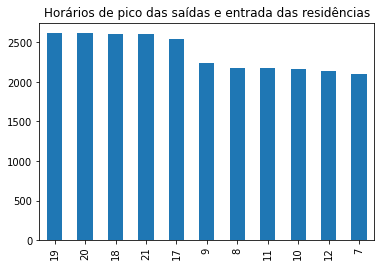

In [ ]:
df_portaria['Hora'].value_counts().plot(kind='bar')
plt.title('Horários de pico das saídas e entrada das residências')
plt.show()

In [ ]:
df_portaria['nr_condominio'].value_counts()

12    19988
17     6034
Name: nr_condominio, dtype: int64

In [ ]:
df_portaria['Nome_condominio'].value_counts()

Melissa Garden    19988
Flowers Queen      6034
Name: Nome_condominio, dtype: int64

In [ ]:
df_portaria['dia_semana'].value_counts()

5    3880
2    3856
6    3718
4    3710
3    3708
1    3594
0    3556
Name: dia_semana, dtype: int64

In [ ]:
df_portaria['nr_lote'].value_counts()

9      304
7      296
26     270
1      270
11     264
      ... 
118     62
201     62
73      60
179     58
158     58
Name: nr_lote, Length: 222, dtype: int64

In [ ]:
df_portaria['Tipo Veículo'].value_counts()

Automóvel      25448
Motocicleta      427
Caminhão         139
v                  8
Name: Tipo Veículo, dtype: int64

### Retirando das análises os valores incorretos

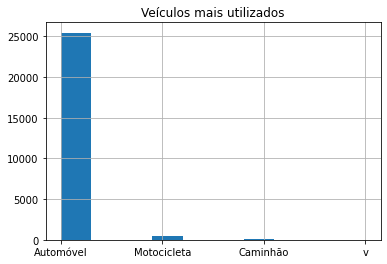

In [ ]:
df_portaria['Tipo Veículo'].hist()
plt.title("Veículos mais utilizados")
plt.show()

In [ ]:
df_portaria.loc[df_portaria['Tipo Veículo'] == 'v']

,nr_movimento,nr_condominio,Nome_condominio,nr_lote,Tipo Veículo,Data_Movimentacao,Hora,entrada_saida,dia_semana
227,19876439,12,Melissa Garden,147,v,2022-04-07,9,Saída,3
955,19877167,12,Melissa Garden,69,v,2022-01-19,8,Saída,2
17171,19981762,12,Melissa Garden,159,v,2021-10-31,17,Entrada,6
17591,19982182,12,Melissa Garden,110,v,2022-04-24,18,Entrada,6
19831,19984422,12,Melissa Garden,132,v,2022-04-06,19,Entrada,2
20643,19985234,12,Melissa Garden,104,v,2021-12-12,21,Entrada,6
22144,19986735,12,Melissa Garden,172,v,2022-01-05,20,Entrada,2
24188,6679075,17,Flowers Queen,28,v,2021-11-15,20,Entrada,0


In [ ]:
df_portaria = df_portaria.loc[df_portaria['Tipo Veículo'] != 'v']

In [ ]:
df_portaria.loc[df_portaria['Tipo Veículo'] == 'v']

,nr_movimento,nr_condominio,Nome_condominio,nr_lote,Tipo Veículo,Data_Movimentacao,Hora,entrada_saida,dia_semana


### Proporção das horas de entrada e saída dos moradores

In [ ]:
dados_entrada = df_portaria.loc[df_portaria['entrada_saida'] == 'Entrada']

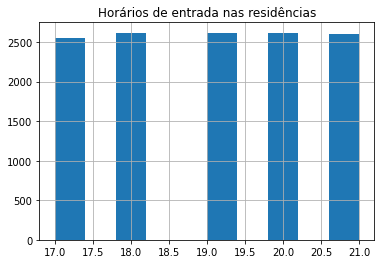

In [ ]:
dados_entrada['Hora'].hist()
plt.title("Horários de entrada nas residências")
plt.show()

In [ ]:
df_portaria.groupby(['dia_semana','entrada_saida'])['dia_semana'].count()

dia_semana  entrada_saida
0           Entrada          1777
            Saída            1778
1           Entrada          1797
            Saída            1797
2           Entrada          1926
            Saída            1927
3           Entrada          1854
            Saída            1853
4           Entrada          1855
            Saída            1855
5           Entrada          1940
            Saída            1940
6           Entrada          1856
            Saída            1859
Name: dia_semana, dtype: int64

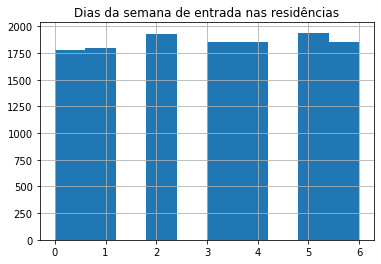

In [ ]:
dados_entrada['dia_semana'].hist()
plt.title("Dias da semana de entrada nas residências")
plt.show()

In [ ]:
dados_saida = df_portaria.loc[df_portaria['entrada_saida'] == 'Saída']

In [ ]:
dados_saida

,nr_movimento,nr_condominio,Nome_condominio,nr_lote,Tipo Veículo,Data_Movimentacao,Hora,entrada_saida,dia_semana
0,19876212,12,Melissa Garden,209,Automóvel,2021-10-12,11,Saída,1
1,19876213,12,Melissa Garden,108,Automóvel,2022-01-25,8,Saída,1
2,19876214,12,Melissa Garden,114,Automóvel,2021-11-03,12,Saída,2
3,19876215,12,Melissa Garden,153,Automóvel,2022-04-12,9,Saída,1
4,19876216,12,Melissa Garden,30,Automóvel,2021-11-21,11,Saída,6
...,...,...,...,...,...,...,...,...,...
13066,65656467,17,Flowers Queen,18,Automóvel,2021-11-24,12,Saída,2
13067,65656468,17,Flowers Queen,28,Automóvel,2022-04-11,12,Saída,0
13068,65656469,17,Flowers Queen,7,Automóvel,2022-03-31,10,Saída,3
13069,65656470,17,Flowers Queen,30,Automóvel,2022-03-03,11,Saída,3


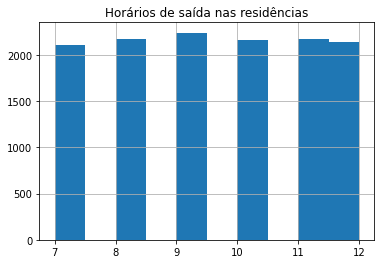

In [ ]:
dados_saida['Hora'].hist()
plt.title("Horários de saída nas residências")
plt.show()

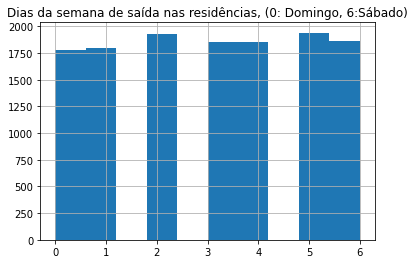

In [ ]:
dados_saida['dia_semana'].hist()
plt.title("Dias da semana de saída nas residências, (0: Domingo, 6:Sábado)")
plt.show()

### Outliers

In [ ]:
dados_entrada.shape

(13005, 9)

In [ ]:
df_unico = dados_entrada

In [ ]:
df_unico['std*1.96'] = 1.96*dados_entrada['Hora'].std()
df_unico['Outlier'] = abs(dados_entrada['Hora'] - dados_entrada['Hora'].mean()) > df_unico['std*1.96']
outliers_dados_entrada = dados_entrada.loc[dados_entrada['Outlier'] == True]
df_unico['Outlier'].value_counts()[False]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


13005

In [ ]:
dados_saida.shape

(13009, 9)

In [ ]:
df_unico = dados_saida
df_unico['std*1.96'] = 1.96*dados_saida['Hora'].std()
df_unico['Outlier'] = abs(dados_saida['Hora'] - dados_saida['Hora'].mean()) > df_unico['std*1.96']
outliers_dados_saida = dados_saida.loc[dados_saida['Outlier'] == True]
df_unico['Outlier'].value_counts()[False]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


13009

In [ ]:
#df[(np.abs(stats.zscore(df['price']))>3)]

### Gráficos séries temporais

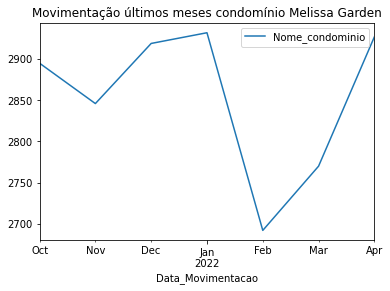

In [ ]:
melissa_garden = df_portaria.loc[df_portaria['Nome_condominio'] == 'Melissa Garden']
melissa_garden_analises = melissa_garden[['Data_Movimentacao', 'Nome_condominio']]
melissa_garden_analises.set_index('Data_Movimentacao', inplace = True)
dados_melissa_garden_agg = melissa_garden_analises.groupby(pd.Grouper(freq='M')).count()
dados_melissa_garden_agg.plot()
plt.title('Movimentação últimos meses condomínio Melissa Garden')
plt.show()

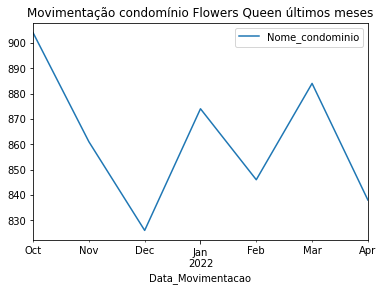

In [ ]:
flowers_queen = df_portaria.loc[df_portaria['Nome_condominio'] == 'Flowers Queen']
flowers_queen_analises = flowers_queen[['Data_Movimentacao', 'Nome_condominio']]
flowers_queen_analises.set_index('Data_Movimentacao', inplace = True)
dados_flowers_queen_agg = flowers_queen_analises.groupby(pd.Grouper(freq='M')).count()
dados_flowers_queen_agg.plot()
plt.title('Movimentação condomínio Flowers Queen últimos meses')
plt.show()

In [ ]:
caminhao = df_portaria.loc[df_portaria['Tipo Veículo'] == 'Caminhão']

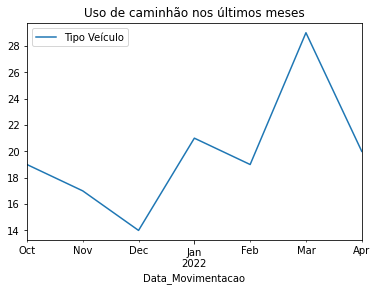

In [ ]:
caminhao_analises = caminhao[['Data_Movimentacao', 'Tipo Veículo']]
caminhao_analises.set_index('Data_Movimentacao', inplace = True)
dados_caminhao_agg = caminhao_analises.groupby(pd.Grouper(freq='M')).count()
dados_caminhao_agg.plot()
plt.title('Uso de caminhão nos últimos meses')
plt.show()

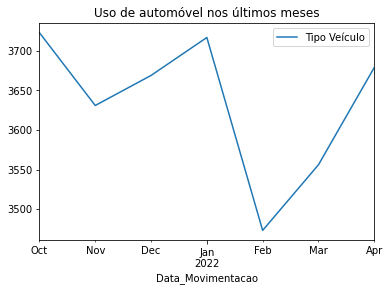

In [ ]:
automovel = df_portaria.loc[df_portaria['Tipo Veículo'] == 'Automóvel']
automovel_analises = automovel[['Data_Movimentacao', 'Tipo Veículo']]
automovel_analises.set_index('Data_Movimentacao', inplace = True)
dados_automovel_agg = automovel_analises.groupby(pd.Grouper(freq='M')).count()
dados_automovel_agg.plot()
plt.title('Uso de automóvel nos últimos meses')
plt.show()

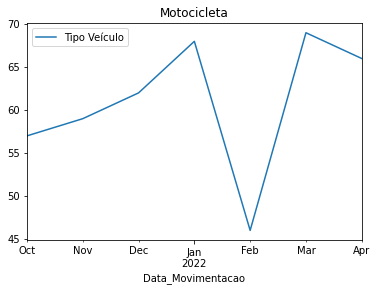

In [ ]:
moto = df_portaria.loc[df_portaria['Tipo Veículo'] == 'Motocicleta']
moto_analises = moto[['Data_Movimentacao', 'Tipo Veículo']]
moto_analises.set_index('Data_Movimentacao', inplace = True)
dados_moto_agg = moto_analises.groupby(pd.Grouper(freq='M')).count()
dados_moto_agg.plot()
plt.title('Motocicleta')
plt.show()

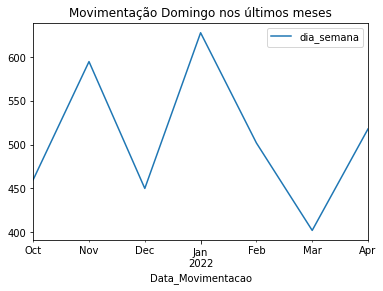

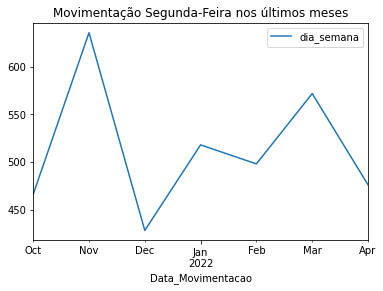

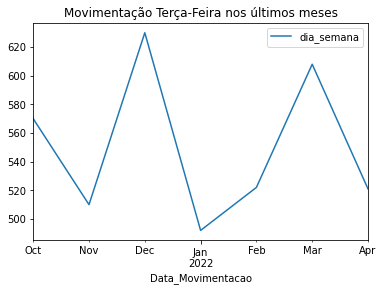

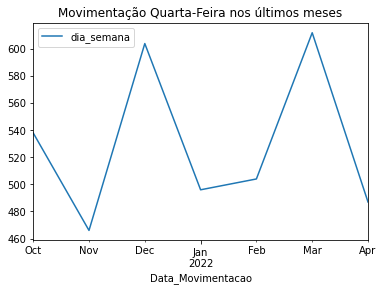

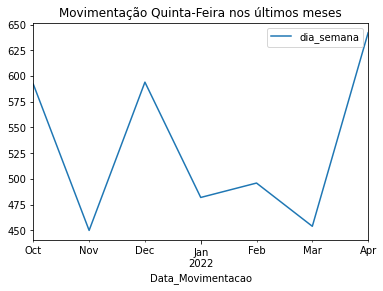

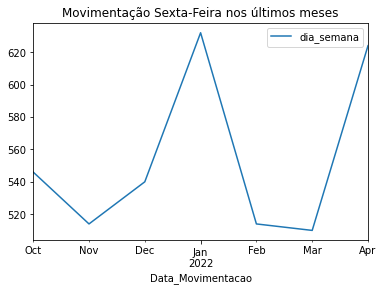

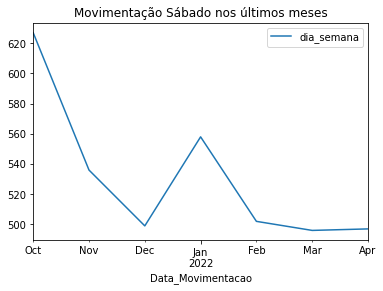

In [ ]:
dias_semana = ['Domingo', 'Segunda-Feira', 'Terça-Feira', 'Quarta-Feira', 'Quinta-Feira', 'Sexta-Feira', 'Sábado']
for i in range(len(dias_semana)):
  flowers_queen = df_portaria.loc[df_portaria['dia_semana'] == i]
  flowers_queen_analises = flowers_queen[['Data_Movimentacao', 'dia_semana']]
  flowers_queen_analises.set_index('Data_Movimentacao', inplace = True)
  dados_flowers_queen_agg = flowers_queen_analises.groupby(pd.Grouper(freq='M')).count()
  dados_flowers_queen_agg.plot()
  plt.title('Movimentação {} nos últimos meses'.format(dias_semana[i]))
  plt.show()

### Verificando uma moradia em específica

In [ ]:
casa1 = df_portaria.loc[df_portaria['nr_lote'] == 209]
casa1

,nr_movimento,nr_condominio,Nome_condominio,nr_lote,Tipo Veículo,Data_Movimentacao,Hora,entrada_saida,dia_semana
0,19876212,12,Melissa Garden,209,Automóvel,2021-10-12,11,Saída,1
14,19876226,12,Melissa Garden,209,Automóvel,2022-02-10,9,Saída,3
82,19876294,12,Melissa Garden,209,Automóvel,2022-04-04,11,Saída,0
236,19876448,12,Melissa Garden,209,Automóvel,2021-10-05,9,Saída,1
250,19876462,12,Melissa Garden,209,Automóvel,2022-03-15,9,Saída,1
...,...,...,...,...,...,...,...,...,...
22422,19987013,12,Melissa Garden,209,Automóvel,2022-01-10,19,Entrada,0
22582,19987173,12,Melissa Garden,209,Automóvel,2021-11-05,21,Entrada,4
22735,19987326,12,Melissa Garden,209,Automóvel,2021-10-30,20,Entrada,5
23006,19987597,12,Melissa Garden,209,Automóvel,2021-11-13,19,Entrada,5


In [ ]:
casa1.sort_values(by=['Data_Movimentacao', 'Hora'])

,nr_movimento,nr_condominio,Nome_condominio,nr_lote,Tipo Veículo,Data_Movimentacao,Hora,entrada_saida,dia_semana
3152,19879364,12,Melissa Garden,209,Automóvel,2021-10-04,8,Saída,0
16223,19980814,12,Melissa Garden,209,Automóvel,2021-10-04,19,Entrada,0
236,19876448,12,Melissa Garden,209,Automóvel,2021-10-05,9,Saída,1
13307,19977898,12,Melissa Garden,209,Automóvel,2021-10-05,19,Entrada,1
6401,19882613,12,Melissa Garden,209,Automóvel,2021-10-08,7,Saída,4
...,...,...,...,...,...,...,...,...,...
17247,19981838,12,Melissa Garden,209,Automóvel,2022-04-15,17,Entrada,4
610,19876822,12,Melissa Garden,209,Automóvel,2022-04-21,9,Saída,3
13681,19978272,12,Melissa Garden,209,Automóvel,2022-04-21,17,Entrada,3
5729,19881941,12,Melissa Garden,209,Automóvel,2022-04-26,7,Saída,1


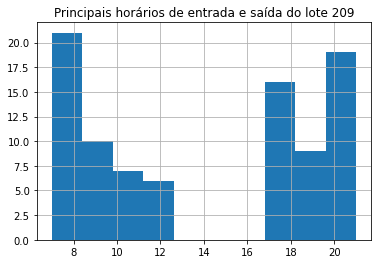

In [ ]:
casa1['Hora'].hist()
plt.title("Principais horários de entrada e saída do lote 209")
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7f5b9744bed0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5b97445f90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b97417fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b97417a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5b97445510>,
  <matplotlib.lines.Line2D at 0x7f5b97445a50>]}

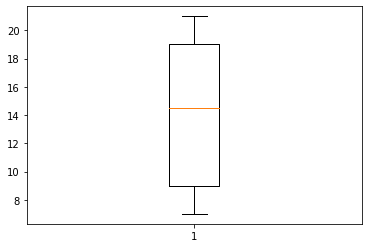

In [ ]:
plt.boxplot(casa1['Hora'])

In [ ]:
entrada_casa1 = casa1.loc[casa1['entrada_saida'] == 'Entrada']
saida_casa1 = casa1.loc[casa1['entrada_saida'] == 'Saída']

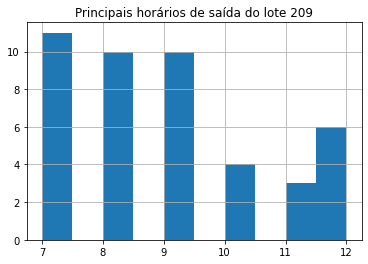

In [ ]:
saida_casa1['Hora'].hist()
plt.title("Principais horários de saída do lote 209")
plt.show()

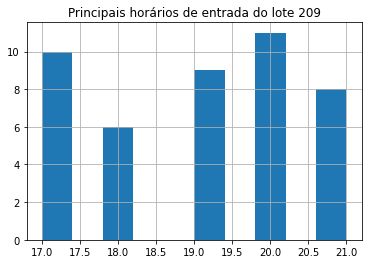

In [ ]:
entrada_casa1['Hora'].hist()
plt.title("Principais horários de entrada do lote 209")
plt.show()

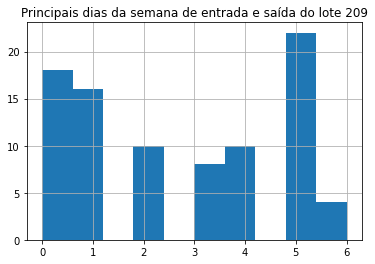

In [ ]:
casa1['dia_semana'].hist()
plt.title("Principais dias da semana de entrada e saída do lote 209")
plt.show()

In [ ]:
entrada_casa1.describe()

,nr_movimento,nr_condominio,nr_lote,Hora,dia_semana
count,4.400000e+01,44.0,44.0,44.000000,44.000000
mean,1.998242e+07,12.0,209.0,19.022727,2.659091
std,3.431341e+03,0.0,0.0,1.438485,2.045337
min,1.997766e+07,12.0,209.0,17.000000,0.000000
25%,1.997877e+07,12.0,209.0,18.000000,1.000000
50%,1.998202e+07,12.0,209.0,19.000000,2.500000
75%,1.998552e+07,12.0,209.0,20.000000,5.000000
max,1.998767e+07,12.0,209.0,21.000000,6.000000


In [ ]:
saida_casa1.describe()

,nr_movimento,nr_condominio,nr_lote,Hora,dia_semana
count,4.400000e+01,44.0,44.0,44.000000,44.000000
mean,1.988097e+07,12.0,209.0,8.909091,2.659091
std,3.431341e+03,0.0,0.0,1.695660,2.045337
min,1.987621e+07,12.0,209.0,7.000000,0.000000
25%,1.987732e+07,12.0,209.0,7.750000,1.000000
50%,1.988058e+07,12.0,209.0,9.000000,2.500000
75%,1.988407e+07,12.0,209.0,10.000000,5.000000
max,1.988622e+07,12.0,209.0,12.000000,6.000000


In [ ]:
entrada_casa1.describe()

,nr_movimento,nr_condominio,nr_lote,Hora,dia_semana
count,4.400000e+01,44.0,44.0,44.000000,44.000000
mean,1.998242e+07,12.0,209.0,19.022727,2.659091
std,3.431341e+03,0.0,0.0,1.438485,2.045337
min,1.997766e+07,12.0,209.0,17.000000,0.000000
25%,1.997877e+07,12.0,209.0,18.000000,1.000000
50%,1.998202e+07,12.0,209.0,19.000000,2.500000
75%,1.998552e+07,12.0,209.0,20.000000,5.000000
max,1.998767e+07,12.0,209.0,21.000000,6.000000


In [ ]:
entrada_casa1['Hora'].corr(entrada_casa1['dia_semana'])

0.018503159047701244

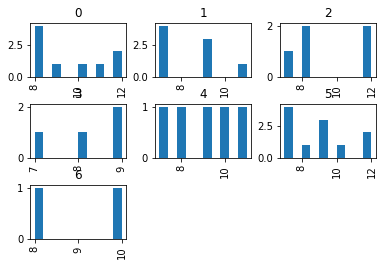

In [ ]:
saida_casa1.hist(by='dia_semana', column='Hora')
plt.show()

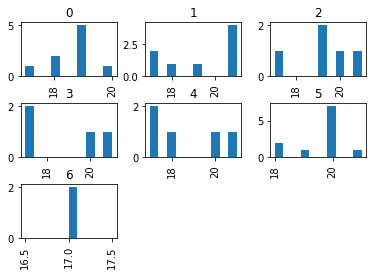

In [ ]:
entrada_casa1.hist(by='dia_semana', column='Hora')
plt.show()

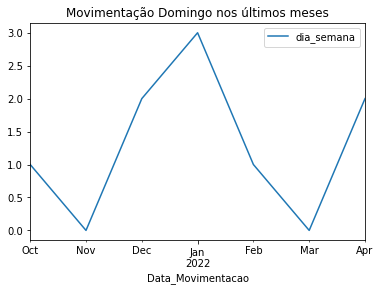

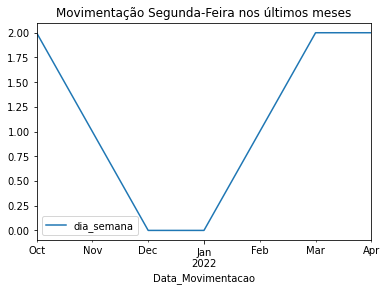

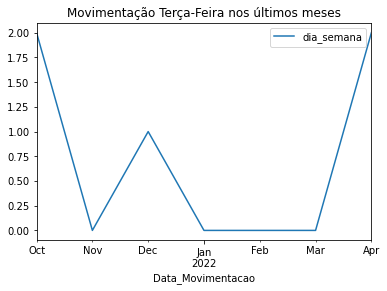

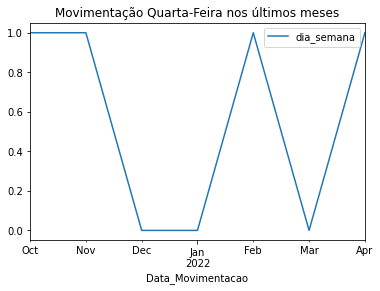

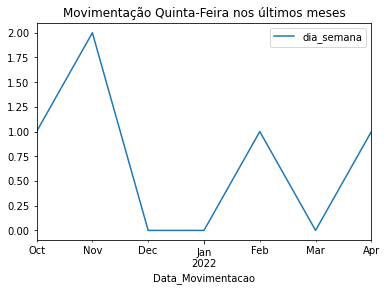

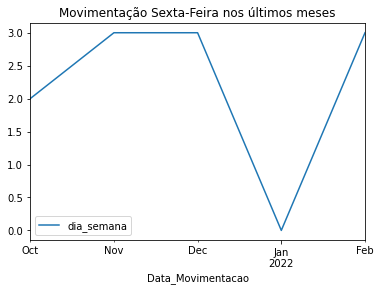

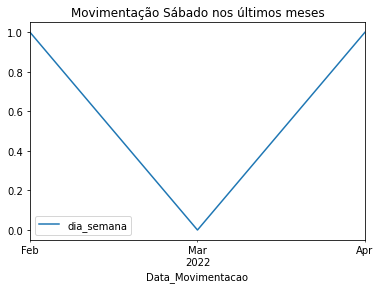

In [ ]:
dias_semana = ['Domingo', 'Segunda-Feira', 'Terça-Feira', 'Quarta-Feira', 'Quinta-Feira', 'Sexta-Feira', 'Sábado']
for i in range(len(dias_semana)):
  flowers_queen = saida_casa1.loc[saida_casa1['dia_semana'] == i]
  flowers_queen_analises = flowers_queen[['Data_Movimentacao', 'dia_semana']]
  flowers_queen_analises.set_index('Data_Movimentacao', inplace = True)
  dados_flowers_queen_agg = flowers_queen_analises.groupby(pd.Grouper(freq='M')).count()
  dados_flowers_queen_agg.plot()
  plt.title('Movimentação {} nos últimos meses'.format(dias_semana[i]))
  plt.show()

In [ ]:
df_portaria['nr_lote'].value_counts()

9      304
7      296
26     270
1      270
11     264
      ... 
118     62
201     62
73      60
179     58
158     58
Name: nr_lote, Length: 222, dtype: int64